In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
np.random.seed(42)
data = np.random.normal(loc=50,scale=10,size=100)
outliers = np.array([10,110,5,120])
data = np.concatenate([data,outliers])

In [3]:
df = pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [4]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


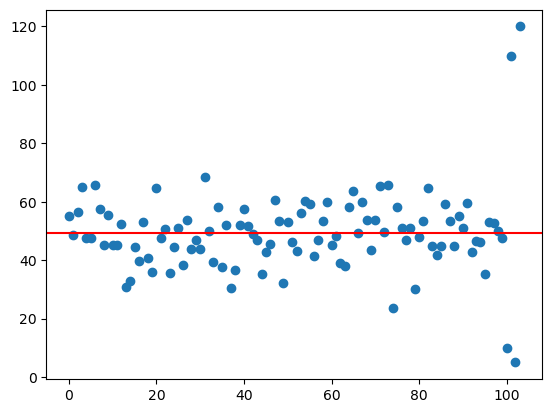

In [12]:
plt.scatter(range(len(df)),df['Values'],label='Data points')
plt.axhline(y=df['Values'].mean(),color='red')

<Axes: ylabel='Values'>

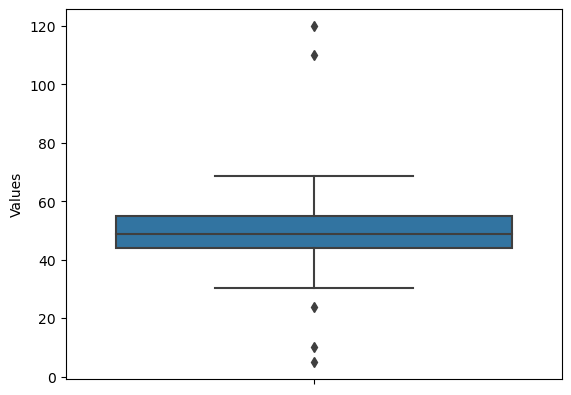

In [14]:
sns.boxplot(data=df,y='Values')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a0efaa1110>,
 'caps': [<matplotlib.lines.Line2D at 0x1a0efaa23d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a0efaa0950>],
 'medians': [<matplotlib.lines.Line2D at 0x1a0efaa3610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a0efa81310>],
 'means': []}

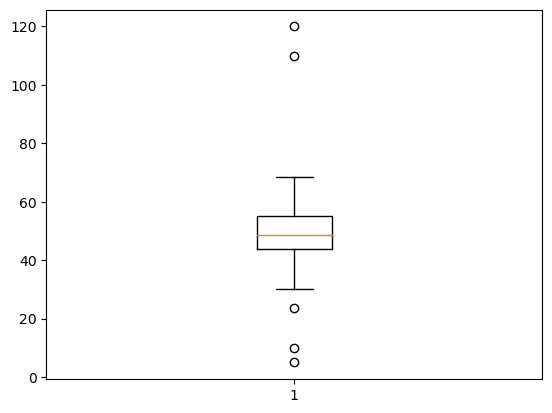

In [15]:
plt.boxplot(x='Values',data=df)
plt.

**Z-score Method**
     z = x-u/sigma
x = data points
u= mean
sigma = std

In [17]:
df['z-score'] = zscore(df['Values'])
df['outliers_z'] = df['z-score'].apply(lambda x:'Outlier' if abs(x) > 3 else 'Normal')
df[df['outliers_z']=='Outlier']

,Values,z-score,outliers_z
101,110.0,4.328173,Outlier
102,5.0,-3.175368,Outlier
103,120.0,5.042796,Outlier


### IQR Method

In [24]:
q1 = df['Values'].quantile(0.25)
q3 = df['Values'].quantile(0.75)
iqr = q3-q1
lb = q1 - 1.5* iqr
ub = q3 + 1.5* iqr
df['outliers'] = df['Values'].apply(lambda x:'Outlier' if (x < lb or x > ub) else 'Normal')
df[df['outliers'] == 'Outlier']

,Values,z-score,outliers_z,Outlier_Z,outliers
74,23.802549,-1.831694,Normal,Outlier,Outlier
100,10.000000,-2.818056,Normal,Outlier,Outlier
101,110.000000,4.328173,Outlier,Outlier,Outlier
102,5.000000,-3.175368,Outlier,Outlier,Outlier
103,120.000000,5.042796,Outlier,Outlier,Outlier


In [23]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
Upper_bound=Q3+1.5*IQR
df['Outlier_Z']=df['Values'].apply(lambda x: 'Outlier' if (x < lower_bound or x > Upper_bound) else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

         Values   z-score outliers_z Outlier_Z
74    23.802549 -1.831694     Normal   Outlier
100   10.000000 -2.818056     Normal   Outlier
101  110.000000  4.328173    Outlier   Outlier
102    5.000000 -3.175368    Outlier   Outlier
103  120.000000  5.042796    Outlier   Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
 
The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.
 
**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**
 

In [26]:
import numpy as np

# Step 1: Create data with normal distribution and outliers
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Normal distribution (mean=50, std=10)
outliers = np.array([10, 110, 5, 120])  # Extreme values (outliers)
data = np.concatenate([data, outliers])  # Merge normal data with outliers

# Step 2: Compute the 5-number summary
Q1 = np.percentile(data, 25)  # First Quartile (25th percentile)
Q2 = np.median(data)  # Median (50th percentile)
Q3 = np.percentile(data, 75)  # Third Quartile (75th percentile)
min_value = np.min(data)  # Minimum value
max_value = np.max(data)  # Maximum value

# Step 3: Compute IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 4: Compute Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Find Outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Step 6: Print Results
print(f"5-Number Summary: \nMin: {min_value}, Q1: {Q1}, Median (Q2): {Q2}, Q3: {Q3}, Max: {max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")


5-Number Summary: 
Min: 5.0, Q1: 43.874401021766715, Median (Q2): 48.73043708220287, Q3: 55.00852473036764, Max: 120.0
IQR: 11.134123708600924
Lower Bound: 27.17321545886533, Upper Bound: 71.70971029326903
Outliers: [ 23.80254896  10.         110.           5.         120.        ]
